In [20]:
# Installing libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

In [52]:
cg = CoinGeckoAPI()

coin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30) # Set id = 'crypto name', ex: 'bitcoin'.

In [53]:
coin_price_data = coin_data['prices'] # This gives us a JSON with price, market caps, and total volumes with timestamps for each obs.

In [54]:
data = pd.DataFrame(coin_price_data, columns=['TimeStamp', 'Price']) # Builds dataframe with TimeStamp and Price as columns.

In [55]:
# TimeStamp data needs to be put into correct format. 
# Needs to be added as a new column in dataframe.
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))

data

,TimeStamp,Price,date
0,1623204228322,32580.523479,2021-06-08
1,1623208362880,32858.187933,2021-06-08
2,1623211644088,32994.428696,2021-06-08
3,1623215865971,32960.484722,2021-06-08
4,1623218543671,33555.604560,2021-06-08
...,...,...,...
716,1625781689934,32855.186521,2021-07-08
717,1625785234171,32573.549339,2021-07-08
718,1625789992905,32933.578199,2021-07-08
719,1625792583825,32406.328806,2021-07-08


In [56]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']}) # Formatted for candlestick figure.

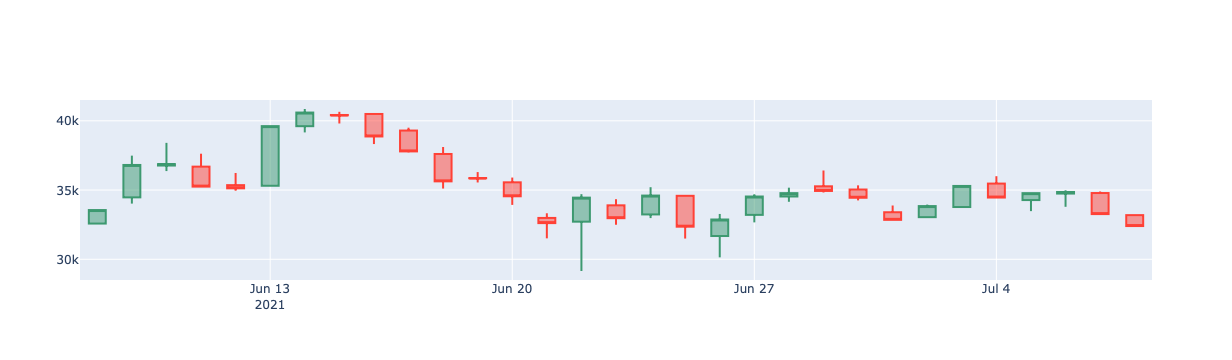

In [57]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()